In [26]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

# ДЗ №8 Гладышев В.В.

## Задание № 1

Можно ли отобрать наиболее значимые признаки с помощью PCA?

При определении главных компонент находятся собственные значения и доля дисперсии для каждого признака. Соответственно производится отбор наиболее значимых признаков

## Задание № 2

Примите участие в одном или двух соревнованиях и пришлите

свой псевдоним на Kaggle и ссылку на github с решением соревнования

Аккаунт: https://www.kaggle.com/vitalygladyshev/account

User Name
vitalygladyshev 

# Choose tutors

## Загрузка и подготовка данных

In [27]:
data_c = pd.read_csv("train_c.csv", sep=",")

In [28]:
data_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
Id                     10000 non-null int64
age                    10000 non-null float64
years_of_experience    10000 non-null float64
lesson_price           10000 non-null float64
qualification          10000 non-null float64
physics                10000 non-null float64
chemistry              10000 non-null float64
biology                10000 non-null float64
english                10000 non-null float64
geography              10000 non-null float64
history                10000 non-null float64
mean_exam_points       10000 non-null float64
choose                 10000 non-null int64
dtypes: float64(11), int64(2)
memory usage: 1015.7 KB


In [29]:
X_c = data_c.drop(['Id', 'choose'], axis = 1)
X_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
age                    10000 non-null float64
years_of_experience    10000 non-null float64
lesson_price           10000 non-null float64
qualification          10000 non-null float64
physics                10000 non-null float64
chemistry              10000 non-null float64
biology                10000 non-null float64
english                10000 non-null float64
geography              10000 non-null float64
history                10000 non-null float64
mean_exam_points       10000 non-null float64
dtypes: float64(11)
memory usage: 859.5 KB


In [30]:
X_c = X_c.values
X_c

array([[3.50e+01, 0.00e+00, 2.15e+03, ..., 0.00e+00, 0.00e+00, 7.40e+01],
       [5.20e+01, 2.00e+00, 1.25e+03, ..., 0.00e+00, 1.00e+00, 5.70e+01],
       [2.90e+01, 3.00e+00, 1.75e+03, ..., 0.00e+00, 0.00e+00, 6.60e+01],
       ...,
       [4.40e+01, 5.00e+00, 1.75e+03, ..., 0.00e+00, 1.00e+00, 5.90e+01],
       [4.10e+01, 0.00e+00, 1.70e+03, ..., 0.00e+00, 0.00e+00, 7.20e+01],
       [4.10e+01, 5.00e+00, 1.20e+03, ..., 0.00e+00, 0.00e+00, 4.00e+01]])

In [31]:
y_c = data_c[['choose']]
y_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
choose    10000 non-null int64
dtypes: int64(1)
memory usage: 78.2 KB


In [32]:
y_c = y_c.values.flatten()
y_c

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [33]:
test_c = pd.read_csv("test_c.csv", sep=",")
test_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
Id                     10000 non-null int64
age                    10000 non-null float64
years_of_experience    10000 non-null float64
lesson_price           10000 non-null float64
qualification          10000 non-null float64
physics                10000 non-null float64
chemistry              10000 non-null float64
biology                10000 non-null float64
english                10000 non-null float64
geography              10000 non-null float64
history                10000 non-null float64
mean_exam_points       10000 non-null float64
dtypes: float64(11), int64(1)
memory usage: 937.6 KB


In [34]:
test_X_c = test_c.drop(['Id'], axis = 1)
test_X_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
age                    10000 non-null float64
years_of_experience    10000 non-null float64
lesson_price           10000 non-null float64
qualification          10000 non-null float64
physics                10000 non-null float64
chemistry              10000 non-null float64
biology                10000 non-null float64
english                10000 non-null float64
geography              10000 non-null float64
history                10000 non-null float64
mean_exam_points       10000 non-null float64
dtypes: float64(11)
memory usage: 859.5 KB


In [35]:
test_X_c = test_X_c.values
test_X_c

array([[3.20e+01, 2.00e+00, 2.70e+03, ..., 0.00e+00, 0.00e+00, 9.00e+01],
       [3.50e+01, 6.00e+00, 1.80e+03, ..., 0.00e+00, 0.00e+00, 7.10e+01],
       [4.40e+01, 2.00e+00, 1.20e+03, ..., 0.00e+00, 0.00e+00, 4.50e+01],
       ...,
       [4.40e+01, 2.00e+00, 1.25e+03, ..., 0.00e+00, 0.00e+00, 6.30e+01],
       [5.10e+01, 5.00e+00, 1.00e+03, ..., 0.00e+00, 0.00e+00, 6.40e+01],
       [4.30e+01, 0.00e+00, 1.50e+03, ..., 0.00e+00, 0.00e+00, 4.10e+01]])

## XGBoost

In [36]:
class Leaf_Reg:
    
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels
        self.prediction = self.predict()
        
    def predict(self):
        prediction = np.mean(self.labels)
        return prediction

In [37]:
class Node:
    # Класс узла
    
    def __init__(self, index, t, true_branch, false_branch):
        self.index = index  # индекс признака, по которому ведется сравнение с порогом в этом узле
        self.t = t  # значение порога
        self.true_branch = true_branch  # поддерево, удовлетворяющее условию в узле
        self.false_branch = false_branch  # поддерево, не удовлетворяющее условию в узле

In [38]:
def quality_reg(left_labels, right_labels, current_variance):

    # доля выбоки, ушедшая в левое поддерево
    p = float(left_labels.shape[0]) / (left_labels.shape[0] + right_labels.shape[0])
    
    return current_variance - p * np.var(left_labels) - (1 - p) * np.var(right_labels)

In [39]:
def split(data, labels, index, t):
    # Разбиение датасета в узле
    
    left = np.where(data[:, index] <= t)
    right = np.where(data[:, index] > t)
        
    true_data = data[left]
    false_data = data[right]
    true_labels = labels[left]
    false_labels = labels[right]
        
    return true_data, false_data, true_labels, false_labels

In [40]:
def find_best_split_reg(data, labels):
    
    #  обозначим минимальное количество объектов в узле
    min_leaf = 5

    current_variance = np.var(labels)

    best_quality = 0
    best_t = None
    best_index = None
    
    n_features = data.shape[1]
    
    for index in range(n_features):
        # будем проверять только уникальные значения признака, исключая повторения
        t_values = np.unique([row[index] for row in data])
        
        for t in t_values:
            true_data, false_data, true_labels, false_labels = split(data, labels, index, t)
            #  пропускаем разбиения, в которых в узле остается менее 5 объектов
            if len(true_data) < min_leaf or len(false_data) < min_leaf:
                continue
            
            current_quality = quality_reg(true_labels, false_labels, current_variance)
            
            #  выбираем порог, на котором получается максимальный прирост качества
            if current_quality > best_quality:
                best_quality, best_t, best_index = current_quality, t, index

    return best_quality, best_t, best_index

In [41]:
def build_tree_reg_depth_lim(data, labels, depth_lim = 20, depth = 0):

    quality, t, index = find_best_split_reg(data, labels)
    #print("q: {} t: {} ind: {}".format(quality, t, index))

    #  Базовый случай - прекращаем рекурсию, когда нет прироста в качества
    if quality == 0 or depth >= depth_lim:
        return Leaf_Reg(data, labels)

    true_data, false_data, true_labels, false_labels = split(data, labels, index, t)

    # Рекурсивно строим два поддерева
    true_branch = build_tree_reg_depth_lim(true_data, true_labels, depth_lim, depth + 1)
    false_branch = build_tree_reg_depth_lim(false_data, false_labels, depth_lim, depth + 1)

    # Возвращаем класс узла со всеми поддеревьями, то есть целого дерева
    return Node(index, t, true_branch, false_branch)

In [42]:
def pred_item(item, node):

    #  Останавливаем рекурсию, если достигли листа
    if isinstance(node, Leaf_Reg):
        answer = node.prediction
        return answer

    if item[node.index] <= node.t:
        return pred_item(item, node.true_branch)
    else:
        return pred_item(item, node.false_branch)

In [43]:
def gb_predict_m(X, trees_list, coef_list, eta):
    # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
    # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании прибавляются с шагом eta
    return np.array([sum([eta * coef * pred_item(x, tree) for tree, coef in zip(trees_list, coef_list)]) for x in X])

In [44]:
def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

In [45]:
def bias(y, z):
    return (y - z)

In [46]:
def gb_fit_lt(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    
    # Деревья будем записывать в список
    trees = []
    err_min = np.inf
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):

        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree = build_tree_reg_depth_lim(X_train, y_train, max_depth)
            
            train_errors.append(mean_squared_error(y_train, gb_predict_m(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict_m(X_test, trees, coefs, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict_m(X_train, trees, coefs, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree = build_tree_reg_depth_lim(X_train, bias(y_train, target), max_depth)
            
            train_errors.append(mean_squared_error(y_train, gb_predict_m(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict_m(X_test, trees, coefs, eta)))

            if test_errors[-1]-0.00005 > err_min:
                print(len(trees))
                break
            elif test_errors[-1] < err_min:
                err_min = test_errors[-1]

        if not (i+1)%10:
            print(i+1)
        trees.append(tree)
        
    return trees, train_errors, test_errors

In [47]:
def get_error_plot(n_trees, train_err, test_err):
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
    plt.xlim(2, n_trees+1)
    plt.plot(list(range(2, n_trees+1)), train_err[1:], label='train error')
    plt.plot(list(range(2, n_trees+1)), test_err[1:], label='test error')
    plt.legend(loc='upper right')
    plt.show()

In [48]:
def grid_mtr(n_trees_l, max_depth_l, eta_l, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    err_min = np.inf
    for tr in n_trees_l:
        for dp in max_depth_l:
            for et in eta_l:
                coefs = [1] * tr # для простоты примем коэффициенты равными 1
                trees, train_errors, test_errors = gb_fit_lt(tr, dp, X_train, X_test, y_train, y_test, coefs, et)
                train_prediction = gb_predict_m(X_train, trees, coefs, et)
                print(f'Ошибка алгоритма из {len(trees)} деревьев глубиной {dp} с шагом {et} на тренировочной выборке: {mean_squared_error(y_train, train_prediction)}')
                test_prediction = gb_predict_m(X_test, trees, coefs, et)
                err = mean_squared_error(y_test, test_prediction)
                print(f'Ошибка алгоритма из {len(trees)} деревьев глубиной {dp} с шагом {et} на тестовой выборке: {err}')
                if err_min > err:
                    tr_b = len(trees)
                    dp_b = dp
                    et_b = et
                    err_min = err
                get_error_plot(len(train_errors), train_errors, test_errors)
    print(f'Лучшие параметры: Ошибка алгоритма из {tr_b} деревьев глубиной {dp_b} с шагом {et_b} на тестовой выборке: {err_min}')
    return tr_b, dp_b, et_b

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
164
Ошибка алгоритма из 164 деревьев глубиной 2 с шагом 0.1 на тренировочной выборке: 0.07465312290292768
Ошибка алгоритма из 164 деревьев глубиной 2 с шагом 0.1 на тестовой выборке: 0.08201381827362225


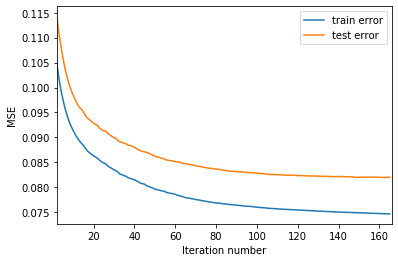

10
20
30
40
50
60
70
80
90
100
107
Ошибка алгоритма из 107 деревьев глубиной 3 с шагом 0.1 на тренировочной выборке: 0.07150808254798571
Ошибка алгоритма из 107 деревьев глубиной 3 с шагом 0.1 на тестовой выборке: 0.08156795472866421


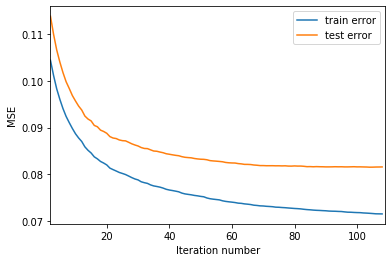

10
20
30
40
50
60
70
78
Ошибка алгоритма из 78 деревьев глубиной 4 с шагом 0.1 на тренировочной выборке: 0.06851043728784233
Ошибка алгоритма из 78 деревьев глубиной 4 с шагом 0.1 на тестовой выборке: 0.08194834690740663


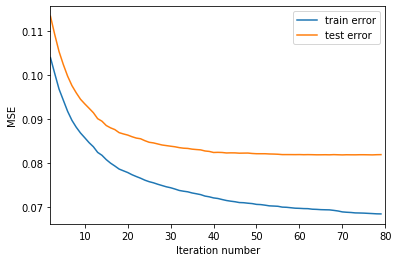

10
20
30
40
50
53
Ошибка алгоритма из 53 деревьев глубиной 5 с шагом 0.1 на тренировочной выборке: 0.0663800254037334
Ошибка алгоритма из 53 деревьев глубиной 5 с шагом 0.1 на тестовой выборке: 0.0820242612998339


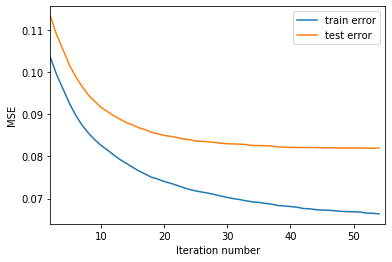

10
20
30
34
Ошибка алгоритма из 34 деревьев глубиной 6 с шагом 0.1 на тренировочной выборке: 0.06423850768183717
Ошибка алгоритма из 34 деревьев глубиной 6 с шагом 0.1 на тестовой выборке: 0.08333291577517919


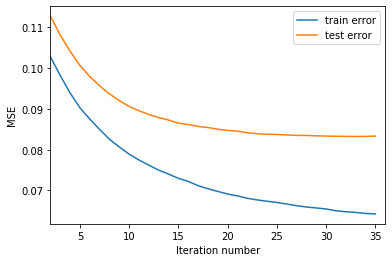

Лучшие параметры: Ошибка алгоритма из 107 деревьев глубиной 3 с шагом 0.1 на тестовой выборке: 0.08156795472866421


In [49]:
n_trees_l = [350]
max_depth_l = [2, 3, 4, 5, 6]
eta_l = [0.1]

tr_b, dp_b, et_b = grid_mtr(n_trees_l, max_depth_l, eta_l, X_c, y_c)

Лучшие параметры: Ошибка алгоритма из 107 деревьев глубиной 3 с шагом 0.1 на тестовой выборке: 0.08156795472866421

In [50]:
def gb_fit_fin(n_trees, max_depth, X, y, coefs, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки
    errors = []
    
    for i in range(n_trees):

        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree = build_tree_reg_depth_lim(X, y, max_depth)
            
            errors.append(mean_squared_error(y, gb_predict_m(X, trees, coefs, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict_m(X, trees, coefs, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree = build_tree_reg_depth_lim(X, bias(y, target), max_depth)
            
            errors.append(mean_squared_error(y, gb_predict_m(X, trees, coefs, eta)))

        trees.append(tree)
        
    return trees, errors

In [52]:
coefs = [1] * tr_b # для простоты примем коэффициенты равными 1

trees, errors = gb_fit_fin(tr_b, dp_b, X_c, y_c, coefs, et_b)

In [54]:
prediction = gb_predict_m(test_X_c, trees, coefs, et_b)

In [55]:
prediction[prediction < 0] = 0
prediction[prediction > 1] = 1

In [56]:
res = test_c[['Id']].copy()
res = pd.concat([res, pd.DataFrame(prediction, columns=['choose'])], axis=1)
res

,Id,choose
0,10000,0.019587
1,10001,0.159179
2,10002,0.003890
3,10003,0.014285
4,10004,0.152729
5,10005,0.435720
6,10006,0.019879
7,10007,0.168528
8,10008,0.000000
9,10009,0.298126


In [57]:
res.to_csv("viv_cl_01.csv", sep=",", index=False)

# Tutors - expected math exam results

## Загрузка и подготовка данных

In [58]:
data_r = pd.read_csv("train_r.csv", sep=",")

In [59]:
data_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
Id                     10000 non-null int64
age                    10000 non-null float64
years_of_experience    10000 non-null float64
lesson_price           10000 non-null float64
qualification          10000 non-null float64
physics                10000 non-null float64
chemistry              10000 non-null float64
biology                10000 non-null float64
english                10000 non-null float64
geography              10000 non-null float64
history                10000 non-null float64
mean_exam_points       10000 non-null float64
dtypes: float64(11), int64(1)
memory usage: 937.6 KB


In [60]:
X_r = data_r.drop(['Id', 'mean_exam_points'], axis = 1)
X_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
age                    10000 non-null float64
years_of_experience    10000 non-null float64
lesson_price           10000 non-null float64
qualification          10000 non-null float64
physics                10000 non-null float64
chemistry              10000 non-null float64
biology                10000 non-null float64
english                10000 non-null float64
geography              10000 non-null float64
history                10000 non-null float64
dtypes: float64(10)
memory usage: 781.3 KB


In [61]:
X_r = X_r.values
X_r

array([[4.00e+01, 0.00e+00, 1.40e+03, ..., 0.00e+00, 1.00e+00, 0.00e+00],
       [4.80e+01, 4.00e+00, 2.85e+03, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [3.90e+01, 0.00e+00, 1.20e+03, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       ...,
       [3.40e+01, 1.00e+00, 1.25e+03, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [3.30e+01, 3.00e+00, 1.10e+03, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [3.50e+01, 0.00e+00, 1.45e+03, ..., 0.00e+00, 0.00e+00, 0.00e+00]])

In [62]:
y_r = data_r[['mean_exam_points']]
y_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
mean_exam_points    10000 non-null float64
dtypes: float64(1)
memory usage: 78.2 KB


In [63]:
y_r = y_r.values.flatten()
y_r

array([63., 86., 53., ..., 58., 51., 59.])

In [64]:
test_r = pd.read_csv("test_r.csv", sep=",")

In [65]:
test_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
Id                     10000 non-null int64
age                    10000 non-null float64
years_of_experience    10000 non-null float64
lesson_price           10000 non-null float64
qualification          10000 non-null float64
physics                10000 non-null float64
chemistry              10000 non-null float64
biology                10000 non-null float64
english                10000 non-null float64
geography              10000 non-null float64
history                10000 non-null float64
dtypes: float64(10), int64(1)
memory usage: 859.5 KB


In [66]:
test_X_r = test_r.drop(['Id'], axis = 1)
test_X_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
age                    10000 non-null float64
years_of_experience    10000 non-null float64
lesson_price           10000 non-null float64
qualification          10000 non-null float64
physics                10000 non-null float64
chemistry              10000 non-null float64
biology                10000 non-null float64
english                10000 non-null float64
geography              10000 non-null float64
history                10000 non-null float64
dtypes: float64(10)
memory usage: 781.3 KB


In [67]:
test_X_r = test_X_r.values
test_X_r

array([[4.60e+01, 3.00e+00, 1.05e+03, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [4.30e+01, 3.00e+00, 1.85e+03, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [5.20e+01, 1.00e+00, 1.55e+03, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       ...,
       [3.30e+01, 5.00e+00, 1.10e+03, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [4.80e+01, 0.00e+00, 1.75e+03, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [4.90e+01, 5.00e+00, 2.00e+03, ..., 0.00e+00, 0.00e+00, 0.00e+00]])

## XGBoost

In [68]:
class Leaf_Reg:
    
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels
        self.prediction = self.predict()
        
    def predict(self):
        prediction = np.mean(self.labels)
        return prediction 

In [69]:
class Node:
    # Класс узла
    
    def __init__(self, index, t, true_branch, false_branch):
        self.index = index  # индекс признака, по которому ведется сравнение с порогом в этом узле
        self.t = t  # значение порога
        self.true_branch = true_branch  # поддерево, удовлетворяющее условию в узле
        self.false_branch = false_branch  # поддерево, не удовлетворяющее условию в узле

In [70]:
def quality_reg(left_labels, right_labels, current_variance):

    # доля выбоки, ушедшая в левое поддерево
    p = float(left_labels.shape[0]) / (left_labels.shape[0] + right_labels.shape[0])
    
    return current_variance - p * np.var(left_labels) - (1 - p) * np.var(right_labels)

In [71]:
def split(data, labels, index, t):
    # Разбиение датасета в узле
    
    left = np.where(data[:, index] <= t)
    right = np.where(data[:, index] > t)
        
    true_data = data[left]
    false_data = data[right]
    true_labels = labels[left]
    false_labels = labels[right]
        
    return true_data, false_data, true_labels, false_labels

In [72]:
def find_best_split_reg(data, labels):
    
    #  обозначим минимальное количество объектов в узле
    min_leaf = 5

    current_variance = np.var(labels)

    best_quality = 0
    best_t = None
    best_index = None
    
    n_features = data.shape[1]
    
    for index in range(n_features):
        # будем проверять только уникальные значения признака, исключая повторения
        t_values = np.unique([row[index] for row in data])
        
        for t in t_values:
            true_data, false_data, true_labels, false_labels = split(data, labels, index, t)
            #  пропускаем разбиения, в которых в узле остается менее 5 объектов
            if len(true_data) < min_leaf or len(false_data) < min_leaf:
                continue
            
            current_quality = quality_reg(true_labels, false_labels, current_variance)
            
            #  выбираем порог, на котором получается максимальный прирост качества
            if current_quality > best_quality:
                best_quality, best_t, best_index = current_quality, t, index

    return best_quality, best_t, best_index

In [73]:
def build_tree_reg_depth_lim(data, labels, depth_lim = 20, depth = 0):

    quality, t, index = find_best_split_reg(data, labels)
    #print("q: {} t: {} ind: {}".format(quality, t, index))

    #  Базовый случай - прекращаем рекурсию, когда нет прироста в качества
    if quality == 0 or depth >= depth_lim:
        return Leaf_Reg(data, labels)

    true_data, false_data, true_labels, false_labels = split(data, labels, index, t)

    # Рекурсивно строим два поддерева
    true_branch = build_tree_reg_depth_lim(true_data, true_labels, depth_lim, depth + 1)
    false_branch = build_tree_reg_depth_lim(false_data, false_labels, depth_lim, depth + 1)

    # Возвращаем класс узла со всеми поддеревьями, то есть целого дерева
    return Node(index, t, true_branch, false_branch)

In [74]:
def pred_item(item, node):

    #  Останавливаем рекурсию, если достигли листа
    if isinstance(node, Leaf_Reg):
        answer = node.prediction
        return answer

    if item[node.index] <= node.t:
        return pred_item(item, node.true_branch)
    else:
        return pred_item(item, node.false_branch)

In [75]:
def gb_predict_m(X, trees_list, coef_list, eta):
    # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
    # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании прибавляются с шагом eta
    return np.array([sum([eta * coef * pred_item(x, tree) for tree, coef in zip(trees_list, coef_list)]) for x in X])

In [76]:
def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

In [77]:
def bias(y, z):
    return (y - z)

In [78]:
def gb_fit_lt(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    
    # Деревья будем записывать в список
    trees = []
    err_min = np.inf
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):

        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree = build_tree_reg_depth_lim(X_train, y_train, max_depth)
            
            train_errors.append(mean_squared_error(y_train, gb_predict_m(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict_m(X_test, trees, coefs, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict_m(X_train, trees, coefs, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree = build_tree_reg_depth_lim(X_train, bias(y_train, target), max_depth)
            
            train_errors.append(mean_squared_error(y_train, gb_predict_m(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict_m(X_test, trees, coefs, eta)))
        
            if test_errors[-1]-0.00005 > err_min:
                print(len(trees))
                break
            elif test_errors[-1] < err_min:
                err_min = test_errors[-1]

        if not (i+1)%10:
            print(i+1)
        trees.append(tree)
        
    return trees, train_errors, test_errors

In [79]:
def get_error_plot(n_trees, train_err, test_err):
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
    plt.xlim(2, n_trees+1)
    plt.plot(list(range(2, n_trees+1)), train_err[1:], label='train error')
    plt.plot(list(range(2, n_trees+1)), test_err[1:], label='test error')
    plt.legend(loc='upper right')
    plt.show()

In [80]:
def grid_mtr(n_trees_l, max_depth_l, eta_l, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    err_min = np.inf
    for tr in n_trees_l:
        for dp in max_depth_l:
            for et in eta_l:
                coefs = [1] * tr # для простоты примем коэффициенты равными 1
                trees, train_errors, test_errors = gb_fit_lt(tr, dp, X_train, X_test, y_train, y_test, coefs, et)
                train_prediction = gb_predict_m(X_train, trees, coefs, et)
                print(f'Ошибка алгоритма из {len(trees)} деревьев глубиной {dp} с шагом {et} на тренировочной выборке: {mean_squared_error(y_train, train_prediction)}')
                test_prediction = gb_predict_m(X_test, trees, coefs, et)
                err = mean_squared_error(y_test, test_prediction)
                print(f'Ошибка алгоритма из {len(trees)} деревьев глубиной {dp} с шагом {et} на тестовой выборке: {err}')
                if err_min > err:
                    tr_b = len(trees)
                    dp_b = dp
                    et_b = et
                    err_min = err
                get_error_plot(len(train_errors), train_errors, test_errors)
    print(f'Лучшие параметры: Ошибка алгоритма из {tr_b} деревьев глубиной {dp_b} с шагом {et_b} на тестовой выборке: {err_min}')
    return tr_b, dp_b, et_b

10
20
30
40
50
60
70
80
90
92
Ошибка алгоритма из 92 деревьев глубиной 2 с шагом 0.1 на тренировочной выборке: 45.512046334363106
Ошибка алгоритма из 92 деревьев глубиной 2 с шагом 0.1 на тестовой выборке: 45.773685792892906


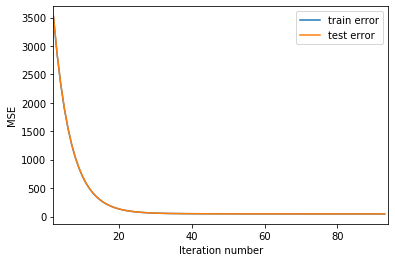

10
20
30
40
50
60
64
Ошибка алгоритма из 64 деревьев глубиной 3 с шагом 0.1 на тренировочной выборке: 41.89113667547048
Ошибка алгоритма из 64 деревьев глубиной 3 с шагом 0.1 на тестовой выборке: 42.42853366646157


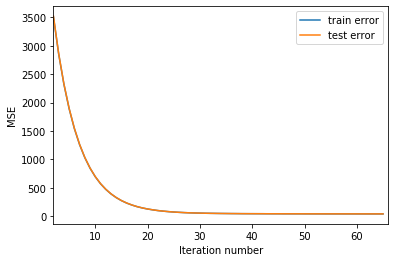

10
20
30
40
50
53
Ошибка алгоритма из 53 деревьев глубиной 4 с шагом 0.1 на тренировочной выборке: 39.30172692274517
Ошибка алгоритма из 53 деревьев глубиной 4 с шагом 0.1 на тестовой выборке: 40.93614033110244


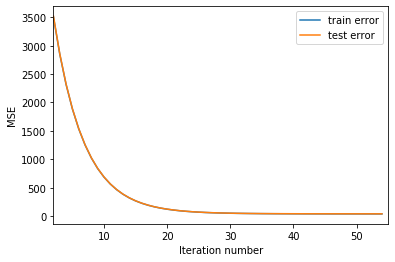

10
20
30
40
50
50
Ошибка алгоритма из 50 деревьев глубиной 5 с шагом 0.1 на тренировочной выборке: 37.18012167521226
Ошибка алгоритма из 50 деревьев глубиной 5 с шагом 0.1 на тестовой выборке: 40.0707502386174


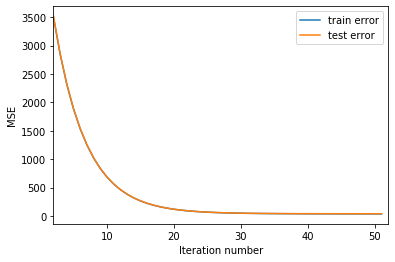

10
20
30
40
49
Ошибка алгоритма из 49 деревьев глубиной 6 с шагом 0.1 на тренировочной выборке: 34.297597858739415
Ошибка алгоритма из 49 деревьев глубиной 6 с шагом 0.1 на тестовой выборке: 40.08273590141749


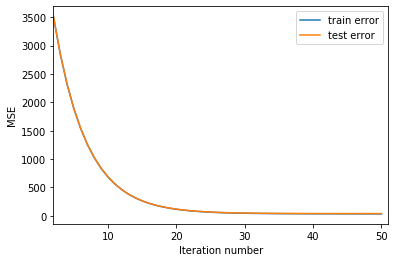

Лучшие параметры: Ошибка алгоритма из 50 деревьев глубиной 5 с шагом 0.1 на тестовой выборке: 40.0707502386174


In [81]:
n_trees_l = [350]
max_depth_l = [2, 3, 4, 5, 6]
eta_l = [0.1]

tr_b, dp_b, et_b = grid_mtr(n_trees_l, max_depth_l, eta_l, X_r, y_r)

Ошибка алгоритма из 10 деревьев глубиной 3 с шагом 1 на тренировочной выборке: 41.85032639612631

Ошибка алгоритма из 10 деревьев глубиной 3 с шагом 1 на тестовой выборке: 42.89189222152119

Ошибка алгоритма из 10 деревьев глубиной 3 с шагом 0.1 на тренировочной выборке: 572.8473411680155

Ошибка алгоритма из 10 деревьев глубиной 3 с шагом 0.1 на тестовой выборке: 574.893182109124

Ошибка алгоритма из 10 деревьев глубиной 5 с шагом 1 на тренировочной выборке: 35.759331381826996

Ошибка алгоритма из 10 деревьев глубиной 5 с шагом 1 на тестовой выборке: 43.89510402271741

Ошибка алгоритма из 10 деревьев глубиной 5 с шагом 0.1 на тренировочной выборке: 562.3994214587036

Ошибка алгоритма из 10 деревьев глубиной 5 с шагом 0.1 на тестовой выборке: 563.976102338061

Ошибка алгоритма из 100 деревьев глубиной 3 с шагом 1 на тренировочной выборке: 34.81778222149674

Ошибка алгоритма из 100 деревьев глубиной 3 с шагом 1 на тестовой выборке: 42.39123563605255

Ошибка алгоритма из 100 деревьев глубиной 3 с шагом 0.1 на тренировочной выборке: 40.53835649064402

Ошибка алгоритма из 100 деревьев глубиной 3 с шагом 0.1 на тестовой выборке: 41.71821615536555

Ошибка алгоритма из 100 деревьев глубиной 5 с шагом 1 на тренировочной выборке: 24.808303083037085

Ошибка алгоритма из 100 деревьев глубиной 5 с шагом 1 на тестовой выборке: 51.84322827702307

Ошибка алгоритма из 100 деревьев глубиной 5 с шагом 0.1 на тренировочной выборке: 34.61620200766768

Ошибка алгоритма из 100 деревьев глубиной 5 с шагом 0.1 на тестовой выборке: 40.00489589817885

Лучшие параметры: Ошибка алгоритма из 100 деревьев глубиной 5 с шагом 0.1 на тестовой выборке: 40.00489589817885

In [82]:
def gb_fit_lt_half_div(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    half_n = X_train.shape[0] // 2
        
    for i in range(n_trees):
        if i % 2:
            b = 1
        else:
            b = 0
        beg_b = half_n*b
        end_b = half_n*(b+1)
        X_tr = X[beg_b : end_b, :]
        y_tr = y[beg_b : end_b]
        
        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            
            tree = build_tree_reg_depth_lim(X_tr, y_tr, max_depth)

            train_errors.append(mean_squared_error(y_tr, gb_predict_m(X_tr, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict_m(X_test, trees, coefs, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict_m(X_tr, trees, coefs, eta)

            # алгоритмы начиная со второго обучаем на сдвиг
            tree = build_tree_reg_depth_lim(X_tr, bias(y_tr, target), max_depth)

            train_errors.append(mean_squared_error(y_tr, gb_predict_m(X_tr, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict_m(X_test, trees, coefs, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

In [83]:
def grid_mtr_hd(n_trees_l, max_depth_l, eta_l, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    err_min = np.inf
    for tr in n_trees_l:
        for dp in max_depth_l:
            for et in eta_l:
                coefs = [1] * tr # для простоты примем коэффициенты равными 1
                trees, train_errors, test_errors = gb_fit_lt_half_div(tr, dp, X_train, X_test, y_train, y_test, coefs, et)
                train_prediction = gb_predict_m(X_train, trees, coefs, et)
                print(f'Ошибка алгоритма из {tr} деревьев глубиной {dp} с шагом {et} на тренировочной выборке: {mean_squared_error(y_train, train_prediction)}')
                test_prediction = gb_predict_m(X_test, trees, coefs, et)
                err = mean_squared_error(y_test, test_prediction)
                print(f'Ошибка алгоритма из {tr} деревьев глубиной {dp} с шагом {et} на тестовой выборке: {err}')
                if err_min > err:
                    tr_b = tr
                    dp_b = dp
                    et_b = et
                    err_min = err
                get_error_plot(tr, train_errors, test_errors)
    print(f'Лучшие параметры: Ошибка алгоритма из {tr} деревьев глубиной {dp} с шагом {et} на тестовой выборке: {err_min}')
    return tr_b, dp_b, et_b

In [84]:
# n_trees_l = [10, 20]
# max_depth_l = [3, 5]
# eta_l = [1, 0.1]

# grid_mtr_hd(n_trees_l, max_depth_l, eta_l, X, y)

Ошибка алгоритма из 10 деревьев глубиной 3 с шагом 1 на тренировочной выборке: 42.70422172191151

Ошибка алгоритма из 10 деревьев глубиной 3 с шагом 1 на тестовой выборке: 41.539402682141215

Ошибка алгоритма из 10 деревьев глубиной 3 с шагом 0.1 на тренировочной выборке: 571.9243308818674

Ошибка алгоритма из 10 деревьев глубиной 3 с шагом 0.1 на тестовой выборке: 573.9409296079313

Ошибка алгоритма из 10 деревьев глубиной 5 с шагом 1 на тренировочной выборке: 41.473279828165296

Ошибка алгоритма из 10 деревьев глубиной 5 с шагом 1 на тестовой выборке: 41.03750497923822

Ошибка алгоритма из 10 деревьев глубиной 5 с шагом 0.1 на тренировочной выборке: 563.2971153354056

Ошибка алгоритма из 10 деревьев глубиной 5 с шагом 0.1 на тестовой выборке: 565.1061224587446

Ошибка алгоритма из 100 деревьев глубиной 3 с шагом 1 на тренировочной выборке: 42.21129533444066

Ошибка алгоритма из 100 деревьев глубиной 3 с шагом 1 на тестовой выборке: 41.23236827909047

Ошибка алгоритма из 100 деревьев глубиной 3 с шагом 0.1 на тренировочной выборке: 41.59138863736706

Ошибка алгоритма из 100 деревьев глубиной 3 с шагом 0.1 на тестовой выборке: 40.98707632425514

Ошибка алгоритма из 100 деревьев глубиной 5 с шагом 1 на тренировочной выборке: 42.028156812894004

Ошибка алгоритма из 100 деревьев глубиной 5 с шагом 1 на тестовой выборке: 40.08066139900216

Ошибка алгоритма из 100 деревьев глубиной 5 с шагом 0.1 на тренировочной выборке: 38.020462790374985

Ошибка алгоритма из 100 деревьев глубиной 5 с шагом 0.1 на тестовой выборке: 36.069617631755264


Лучшие параметры: Ошибка алгоритма из 100 деревьев глубиной 5 с шагом 0.1 на тестовой выборке: 36.069617631755264

In [85]:
def gb_fit_fin(n_trees, max_depth, X, y, coefs, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки
    errors = []
    
    for i in range(n_trees):

        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree = build_tree_reg_depth_lim(X, y, max_depth)
            
            errors.append(mean_squared_error(y, gb_predict_m(X, trees, coefs, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict_m(X, trees, coefs, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree = build_tree_reg_depth_lim(X, bias(y, target), max_depth)
            
            errors.append(mean_squared_error(y, gb_predict_m(X, trees, coefs, eta)))

        trees.append(tree)
        
    return trees, errors

In [86]:
def gb_fit_fin_hd(n_trees, max_depth, X, y, coefs, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки
    errors = []
    
    half_n = X.shape[0] // 2
    
    for i in range(n_trees):

        if i % 2:
            b = 1
        else:
            b = 0
        beg_b = half_n*b
        end_b = half_n*(b+1)
        X_b = X[beg_b : end_b, :]
        y_b = y[beg_b : end_b]

        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree = build_tree_reg_depth_lim(X_b, y_b, max_depth)
            
            errors.append(mean_squared_error(y_b, gb_predict_m(X_b, trees, coefs, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict_m(X_b, trees, coefs, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree = build_tree_reg_depth_lim(X_b, bias(y_b, target), max_depth)
            
            errors.append(mean_squared_error(y_b, gb_predict_m(X_b, trees, coefs, eta)))

        trees.append(tree)
        
    return trees, errors

In [88]:
coefs = [1] * tr_b # для простоты примем коэффициенты равными 1

trees, errors = gb_fit_fin(tr_b, dp_b, X_r, y_r, coefs, et_b)

In [89]:
prediction = gb_predict_m(test_X_r, trees, coefs, et_b)
prediction

array([54.35267733, 62.85767892, 48.23642062, ..., 54.17657277,
       64.21608391, 69.07970134])

In [90]:
res = test_r[['Id']].copy()
res = pd.concat([res, pd.DataFrame(prediction, columns=['mean_exam_points'])], axis=1)
res

,Id,mean_exam_points
0,10000,54.352677
1,10001,62.857679
2,10002,48.236421
3,10003,90.792668
4,10004,88.816690
5,10005,61.102855
6,10006,42.509173
7,10007,54.606261
8,10008,58.049518
9,10009,78.840065


In [91]:
res.to_csv("viv_reg_03.csv", sep=",", index=False)